In [1]:
import cv2
import matplotlib.pyplot as plt

(555, 832)
(307, 358)
(249, 475)


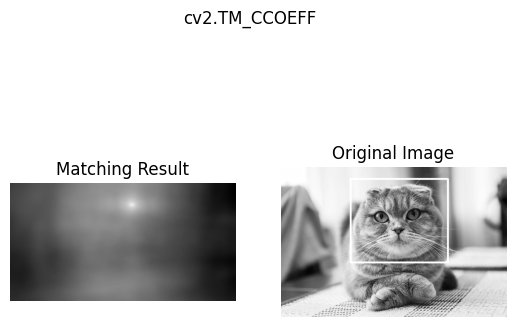

(249, 475)


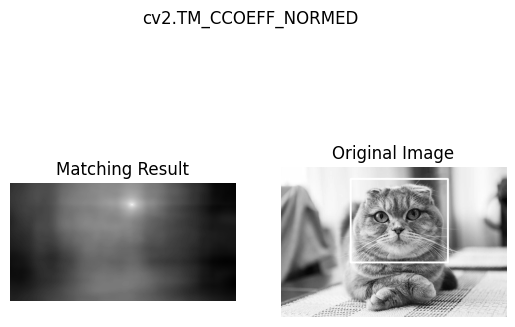

(249, 475)


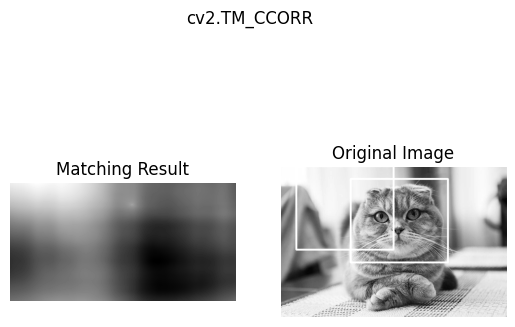

(249, 475)


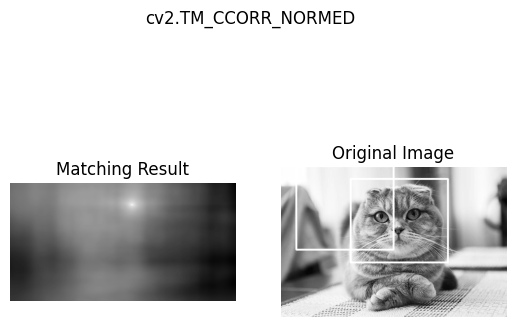

(249, 475)


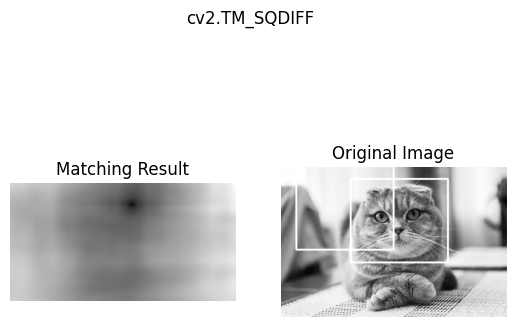

(249, 475)


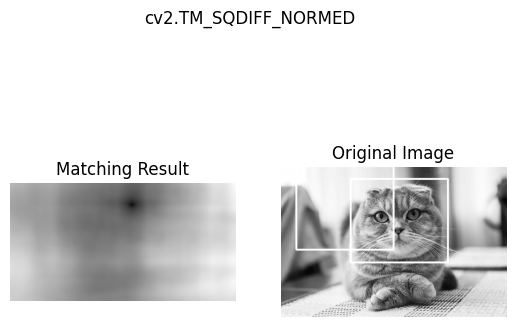

In [8]:
img = cv2.imread("media/cat.jpg",0)
print(img.shape)
template = cv2.imread("media/cat_face.png",0)
print(template.shape)
h,w = template.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods: #methods listesindeki her bir elemanı alır

    method=eval(meth) #eval fonksiyonu stringi python koduna çevirir

    res = cv2.matchTemplate(img,template,method) #resim üzerinde template arar
    print(res.shape) 
    min_val, max_val, min_loc, max_loc =cv2.minMaxLoc(res) #resimdeki en yüksek ve en düşük değerleri bulur

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: #bunun farkli olmnasinin sebebi opencv den dolayi
        top_left = min_loc 
    else:
        top_left= max_loc
    
    bottom_right = (top_left[0]+w, top_left[1]+h) #bulunan template'in koordinatlarını alır

    cv2.rectangle(img,top_left,bottom_right,255,5) #bulunan template'i çerçeve içine alır
    
    plt.figure()

    plt.subplot(121),plt.imshow(res,cmap='gray') #resmi gösterir
    plt.title('Matching Result'),plt.axis("off") #resmin başlığı, ve eksenlerini kapatır

    plt.subplot(122),plt.imshow(img,cmap='gray') #resmi gösterir
    plt.title('Original Image'),plt.axis("off") #resmin başlığı, ve eksenlerini kapatır

    plt.suptitle(meth) #resmin başlığı

    plt.show() #resmi gösterir